## Linear Transformations and Image Rotation

In this demo, we'll explore **linear transformations** in 2D using matrices.  
A linear transformation maps vectors from one space to another, and it can be represented as a **matrix**.

We will see:
- How a **matrix rotates vectors**.
- How **changing the basis** can change the matrix form (later).
- How transformations can be **injective, surjective, or bijective**.

Let's start with a simple **2D rotation**!


## Fashion-MNIST Dataset

For our image transformation demo, we will use the **Fashion-MNIST dataset**.  

- Contains **28x28 grayscale images** of clothing items such as shirts, shoes, and bags.  
- There are **10 classes** in total, like T-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot.  
- Fashion-MNIST is often used as a **drop-in replacement for the original MNIST dataset**, but with more visually interesting items.  
- We will use these images to **demonstrate linear transformations** such as rotation, which is commonly used for **data augmentation in neural networks**.


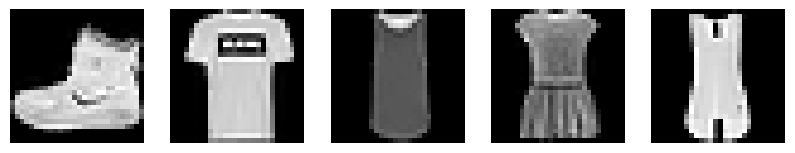

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), _ = fashion_mnist.load_data()
images = X_train[:5]

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()


## Rotating Fashion-MNIST Images

We will now apply a **rotation transformation** to the images.  
- This is a simple example of a **linear transformation in 2D** applied to pixel coordinates.  
- Rotating images is commonly used in **data augmentation** for training neural networks.  
- Note: rotation changes the pixel positions, creating a "new" image, but keeps the image content intact.


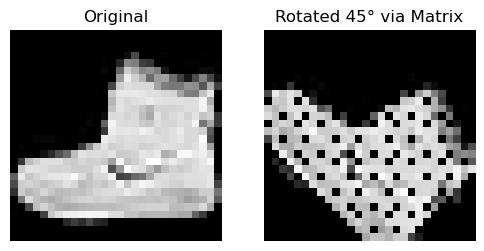

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_image_matrix(img, theta):
    """
    Rotate a 2D image using a rotation matrix.
    """
    h, w = img.shape
    rotated = np.zeros_like(img)
    
    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    
    # Image center
    cx, cy = w//2, h//2
    
    for x in range(w):
        for y in range(h):
            # coordinates relative to center
            coord = np.array([x - cx, y - cy])
            # rotate
            new_coord = R @ coord
            new_x, new_y = new_coord + np.array([cx, cy])
            
            # round and check bounds
            new_x = int(round(new_x))
            new_y = int(round(new_y))
            if 0 <= new_x < w and 0 <= new_y < h:
                rotated[new_y, new_x] = img[y, x]
    
    return rotated

# Example
img = X_train[0]
rotated_img = rotate_image_matrix(img, np.pi/4)  # 45 degrees

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated 45° via Matrix")
plt.axis('off')
plt.show()


## Why Black Dots Appear When Using a Rotation Matrix

When we rotate an image using a **rotation matrix applied directly to pixel coordinates**, you might notice **black dots** appear in the rotated image.  

**Reason:**
- Images are made of **discrete pixels**, but a rotation moves pixels to **non-integer coordinates**.  
- Our simple matrix approach rounds these coordinates to the nearest pixel.
- Some pixels in the output image end up **without any assigned value**, resulting in black spots.

**How libraries handle this:**
- Functions like `scipy.ndimage.rotate` use the **same rotation matrix internally**.
- However, they apply **interpolation techniques** (e.g., bilinear or nearest-neighbor) to fill in the gaps.
- This produces a **smooth rotated image** without black dots.

> This demonstrates the connection between **linear algebra in theory** (matrix multiplication) and **practical image processing** used in neural network pipelines.


## Why Data Augmentation Helps in Training Neural Networks

Data augmentation is a technique where we **artificially increase the size of the training dataset** by applying transformations to the original images.  

**Key benefits:**
1. **Improves Generalization:** Neural networks learn to recognize objects in different orientations, positions, or scales. This helps them perform better on unseen data.
2. **Reduces Overfitting:** With more diverse examples, the network is less likely to memorize the training data and more likely to learn meaningful patterns.
3. **Simulates Real-World Variations:** For example, a shirt might be photographed at a slight angle, or a sneaker might appear rotated. Augmented images mimic these variations.

**Common transformations used:**
- Rotation
- Translation (shifting)
- Scaling (zooming in/out)
- Flipping
- Adding noise

In this demo, we will focus on **rotation**, which is a linear transformation and easy to visualize using **Fashion-MNIST images**.


## Rotating Images at Different Angles

We can create multiple new images by rotating the original image at different angles.  
This is a common way to **augment the dataset** for training neural networks.  
- Each rotation is a **linear transformation**.
- The original information is preserved because the rotation is **bijective**.


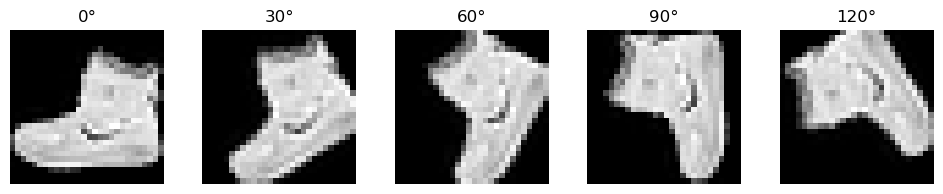

In [20]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Select a single image
img = X_train[0]

# Define rotation angles
angles = [0, 30, 60, 90, 120]

# Plot original and rotated images
plt.figure(figsize=(12,2))
for i, angle in enumerate(angles):
    rotated_img = rotate(img, angle, reshape=False)
    plt.subplot(1, len(angles), i+1)
    plt.imshow(rotated_img, cmap='gray')
    plt.title(f"{angle}°")
    plt.axis('off')
plt.show()


## Linear Transformations and Matrices

- A **linear transformation** maps vectors (or pixel coordinates) from one space to another while preserving **addition and scalar multiplication**.
- Every linear transformation can be represented by a **matrix** in a given basis.  
- Example: rotation by an angle θ in 2D is represented by:

$$
R_\theta = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}
$$|

- This is exactly what we applied to rotate vectors and images.


## Injectivity of Linear Transformations

A transformation is **injective (one-to-one)** if **no two different inputs map to the same output**.

**Why it matters for images and ML:**
- **Preserves information:** Every pixel (or feature) maps to a unique location; nothing is lost.
- **Reversibility:** Only injective transformations can be inverted. You can rotate an image and rotate it back to get the original.
- **Data augmentation:** Injective transformations create new training examples without corrupting the original data.

**Example:** Rotation of an image is injective: each pixel moves to a new, unique position (ignoring discretization artifacts).


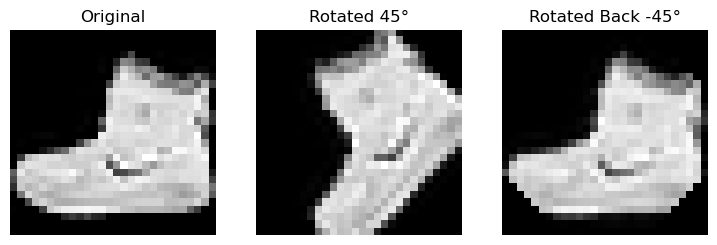

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Select a single Fashion-MNIST image
img = X_train[0]

# Rotate image by 45 degrees
rotated_img = rotate(img, 45, reshape=False)

# Rotate back by -45 degrees
recovered_img = rotate(rotated_img, -45, reshape=False)

# Plot original, rotated, and recovered images
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated 45°")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(recovered_img, cmap='gray')
plt.title("Rotated Back -45°")
plt.axis('off')

plt.show()


## Surjectivity of Linear Transformations

A transformation is **surjective (onto)** if **every point in the target space is reachable** from some input.

**Why it matters for images and ML:**
- Ensures the transformation can generate outputs in all directions or positions.  
- For rotation: any 2D vector can be obtained by rotating some input vector.  
- In data augmentation, this means rotated images can “cover” multiple orientations, helping the neural network generalize better.


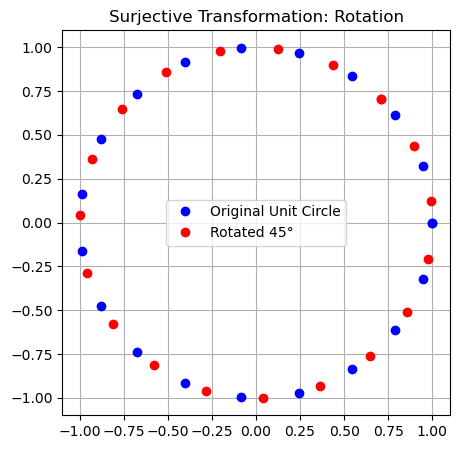

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create points on a unit circle
angles = np.linspace(0, 2*np.pi, 20)
vectors = np.array([np.cos(angles), np.sin(angles)])  # shape (2,20)

# Rotation matrix 45 degrees
theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Rotate all points
rotated_vectors = R @ vectors

plt.figure(figsize=(5,5))
plt.plot(vectors[0,:], vectors[1,:], 'bo', label='Original Unit Circle')
plt.plot(rotated_vectors[0,:], rotated_vectors[1,:], 'ro', label='Rotated 45°')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Surjective Transformation: Rotation")
plt.show()


## Observations: Surjectivity of Rotation

From the unit circle demo:

- **Original points (blue):** Evenly spaced points on the unit circle.  
- **Rotated points (red):** Points after rotation by 45°.  

**Key observations:**

1. **Coverage of the space:**  
   - Both the original and rotated points lie on a circle, covering all directions in 2D.  
   - This illustrates that **every possible direction (output vector) can be reached** from some input vector.

2. **All outputs are attainable:**  
   - No vector in the 2D plane (on the circle) is “missed” by rotation.  
   - This is the essence of **surjectivity**: the transformation maps onto the entire target space.

3. **Implications for data augmentation / ML:**  
   - Rotating images or features can generate samples that explore **all orientations**, helping models learn better.  
   - Surjective transformations ensure that no part of the “output space” is left empty or unreachable.


## Bijectivity of Linear Transformations

A transformation is **bijective** if it is both:
1. **Injective (one-to-one):** No two inputs map to the same output.  
2. **Surjective (onto):** Every point in the target space is reachable.

**Why it matters for images and ML:**
- Bijective transformations are **invertible**: you can always recover the original input from the output.
- For data augmentation, bijectivity ensures that rotated images preserve all information and do not “collapse” or leave any directions uncovered.

**Example:** Rotation of vectors or images in 2D.
- Each input vector/pixel maps to a unique output → injective.  
- Every point in the plane (or directions on a circle) is attainable → surjective.  
- Together, this guarantees **bijectivity** and the existence of an **inverse transformation**.


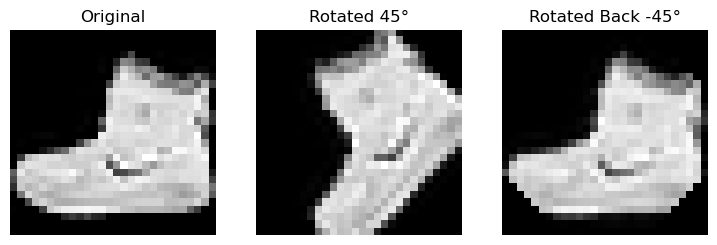

In [41]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Select a single Fashion-MNIST image
img = X_train[0]

# Rotate image by 45 degrees
rotated_img = rotate(img, 45, reshape=False)

# Rotate back by -45 degrees
recovered_img = rotate(rotated_img, -45, reshape=False)

# Plot images
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated 45°")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(recovered_img, cmap='gray')
plt.title("Rotated Back -45°")
plt.axis('off')

plt.show()


## Change of Basis

- A linear transformation can be represented by different matrices depending on the **basis** chosen for the vector space.
- The **effect on vectors** remains the same; only the **coordinates and matrix form** change.
- This demonstrates that **matrices are basis-dependent**, but the transformation itself is intrinsic.

**Example:** Rotation in 2D.
- Standard basis: vectors along x and y axes.  
- New basis: any two independent vectors in the plane.  
- Rotation matrix changes in the new basis, but the rotated vectors are the same in space.


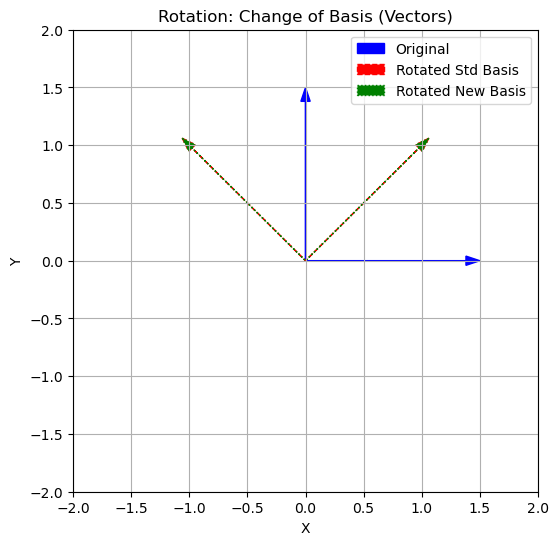

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Original vectors (scale up for visibility)
vectors = np.array([[1.5, 0],
                    [0, 1.5]])

# Rotation matrix 45 degrees
theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Rotate in standard basis
rotated_std = R @ vectors

# New basis
B = np.array([[1, 1],
              [0, 1]])

vectors_new_basis = np.linalg.inv(B) @ vectors
R_new_basis = np.linalg.inv(B) @ R @ B
rotated_new_basis_coords = R_new_basis @ vectors_new_basis
rotated_new_basis = B @ rotated_new_basis_coords

# Plot
plt.figure(figsize=(6,6))

# Original
for i in range(vectors.shape[1]):
    plt.arrow(0, 0, vectors[0,i], vectors[1,i], color='blue', head_width=0.08, length_includes_head=True, label='Original' if i==0 else "")
    
# Rotated in standard basis
for i in range(rotated_std.shape[1]):
    plt.arrow(0, 0, rotated_std[0,i], rotated_std[1,i], color='red', head_width=0.08, linestyle='--', length_includes_head=True, label='Rotated Std Basis' if i==0 else "")

# Rotated in new basis
for i in range(rotated_new_basis.shape[1]):
    plt.arrow(0, 0, rotated_new_basis[0,i], rotated_new_basis[1,i], color='green' ,linestyle=':', head_width=0.08, length_includes_head=True, label='Rotated New Basis' if i==0 else "")

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.title("Rotation: Change of Basis (Vectors)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Observations from the Rotation and Change of Basis Demo

1. **Original vectors (blue)**: These are our starting vectors in the standard basis.

2. **Rotated vectors in the standard basis (red, dashed)**:  
   - Show how the linear transformation (rotation) affects vectors in the standard basis.  
   - Each vector is mapped to a new unique location, demonstrating **injectivity** (no two inputs map to the same output).  

3. **Rotated vectors in the new basis (green, dotted)**:  
   - Represent the same rotation in a different basis.  
   - After converting back to standard coordinates, the green vectors **exactly overlap** with the red vectors.  

4. **Key takeaway – Basis Dependence vs. Transformation Invariance**:  
   - The **matrix representing the rotation changes** when we change the basis.  
   - However, the **effect of the rotation in space remains exactly the same**.  
   - This visually demonstrates that **linear transformations are basis-independent**, but their **matrix representation is basis-dependent**.



v in standard basis: [2 1]
v in new basis coords: [1.5 0.5]
reconstructed back to standard basis: [2. 1.]


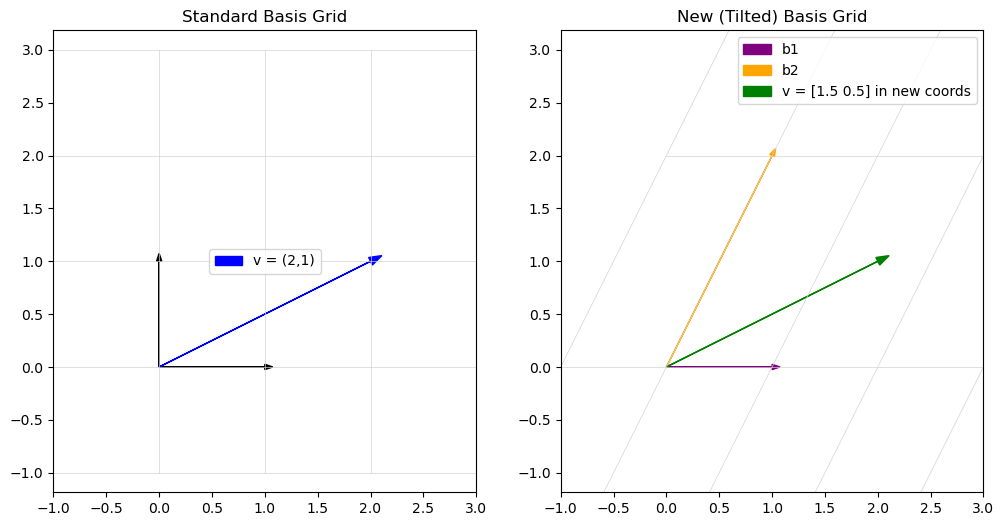

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Vector in standard coordinates
v_std = np.array([2, 1])  

# New tilted basis
B = np.array([[1, 1],
              [0, 2]])


# Change of basis: standard -> new
v_new_coords = np.linalg.inv(B) @ v_std

# Change of basis: new -> standard
v_back = B @ v_new_coords

print("v in standard basis:", v_std)
print("v in new basis coords:", v_new_coords)
print("reconstructed back to standard basis:", v_back)

plt.figure(figsize=(12,6))

# --- Left subplot: standard basis grid ---
plt.subplot(1,2,1)
# draw standard grid
for i in range(-1,4):
    plt.plot([i,i],[-1,3], color='lightgray', lw=0.5)
    plt.plot([-1,3],[i,i], color='lightgray', lw=0.5)
# basis
plt.arrow(0, 0, 1, 0, color='black', head_width=0.05)
plt.arrow(0, 0, 0, 1, color='black', head_width=0.05)
# vector
plt.arrow(0, 0, v_std[0], v_std[1], color='blue', head_width=0.08, label="v = (2,1)")
plt.title("Standard Basis Grid")
plt.grid(False)
plt.axis('equal')
plt.legend()
plt.xlim(-1,3)
plt.ylim(-1,3)

# --- Right subplot: new tilted basis grid ---
plt.subplot(1,2,2)

# draw tilted grid (linear combinations of basis vectors)
grid_range = range(-1,4)
for i in grid_range:
    pts = np.array([i*B[:,0] + j*B[:,1] for j in grid_range])
    plt.plot(pts[:,0], pts[:,1], color='lightgray', lw=0.5)
for j in grid_range:
    pts = np.array([i*B[:,0] + j*B[:,1] for i in grid_range])
    plt.plot(pts[:,0], pts[:,1], color='lightgray', lw=0.5)

# basis vectors
plt.arrow(0, 0, B[0,0], B[1,0], color='purple', head_width=0.05, label="b1")
plt.arrow(0, 0, B[0,1], B[1,1], color='orange', head_width=0.05, label="b2")

# vector expressed in new basis coords
plt.arrow(0, 0, v_back[0], v_back[1], color='green', head_width=0.08, 
          label=f"v = {v_new_coords.round(2)} in new coords")

plt.title("New (Tilted) Basis Grid")
plt.grid(False)
plt.axis('equal')
plt.legend()
plt.xlim(-1,3)
plt.ylim(-1,3)

plt.show()


### Change of Basis Visualization  

This example shows how the same vector can look different depending on the basis we use.  

- **Left plot (Standard Basis):**  
  The standard basis vectors are  
  $$
  e_1 = (1,0), \quad e_2 = (0,1).
  $$  

  Our vector is  
  $$
  v = (2,1),
  $$  
  which is simply shown as the blue arrow.

- **Right plot (New Basis):**  
  We introduce a new tilted basis:  
  $$
  b_1 = (1,0), \quad b_2 = (1,2).
  $$  

  In this new coordinate system, the *same geometric vector* is expressed as  
  $$
  v = 1.5 \cdot b_1 + 0.5 \cdot b_2,
  $$  
  so its coordinates become  
  $$
  (1.5, \; 0.5).
  $$

- **Key Point:**  
  The blue arrow (standard coords) and the green arrow (new coords) both represent the **same geometric vector in space**, but their coordinate representations differ depending on the chosen basis.  

This is the essence of a **change of basis**:  
$$
[v]_{\text{new}} = B^{-1} v_{\text{std}}, 
\quad 
[v]_{\text{std}} = B \, [v]_{\text{new}}
$$
where $B$ is the matrix whose columns are the new basis vectors.


Original vector: [2 1]
After transformation: [3 1]


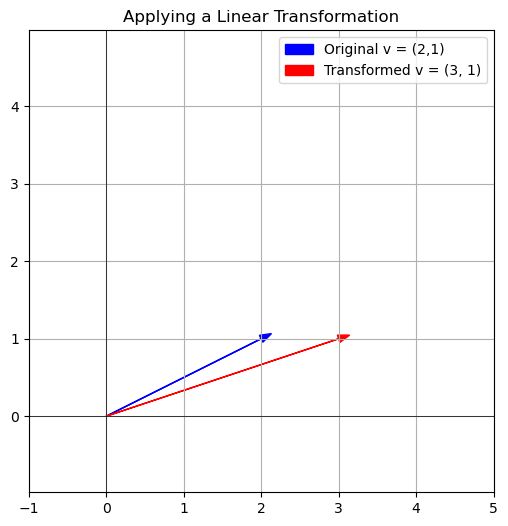

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Original vector
v = np.array([2, 1])

# Example transformation: shear in x-direction
T = np.array([[1, 1],
              [0, 1]])   # Shear matrix

# Apply transformation
v_transformed = T @ v

print("Original vector:", v)
print("After transformation:", v_transformed)

plt.figure(figsize=(6,6))

# Draw axes
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Plot original vector
plt.arrow(0, 0, v[0], v[1], color='blue', head_width=0.1, label="Original v = (2,1)")

# Plot transformed vector
plt.arrow(0, 0, v_transformed[0], v_transformed[1], color='red', head_width=0.1, label=f"Transformed v = {tuple(v_transformed)}")

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.title("Applying a Linear Transformation")
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()


### Linear Transformation Example  

A linear transformation can be represented by a matrix \(T\).  
For example, consider the shear matrix:  

$$
T = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}.
$$

Applying this to our vector  

$$
v = (2,1),
$$

we get  

$$
Tv = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix} 2 \\ 1 \end{bmatrix} 
= \begin{bmatrix} 3 \\ 1 \end{bmatrix}.
$$

- The **blue arrow** shows the original vector.  
- The **red arrow** shows the transformed vector.  

This shows how linear transformations (rotation, scaling, shear, reflection, etc.) act on vectors by multiplying them with a transformation matrix.
